# Módulo 07 - Tarefa 02

## Import Libraries

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score 

# Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

## Importing databases

In [101]:
path= r"C:\Users\Jonatas\Documents\Phyton\Mod 7\demo01.csv"

In [102]:
path

'C:\\Users\\Jonatas\\Documents\\Phyton\\Mod 7\\demo01.csv'

reading de databases

In [103]:
df = pd.read_csv(path)
df = pd.DataFrame(df)
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


checking the shape

In [104]:
df.shape

(16650, 16)

checking the data infos

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Veryfing the informations inside columns 'mau'. 

In [106]:
df['mau'].unique()

array([False,  True])

Veryfing the informations inside columns 'mau'. 

In [107]:
df.groupby(['mau']).count()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
mau,,,,,,,,,,,,,,,
False,16260,16260,16260,16260,16260,16260,16260,16260,16260,16260,16260,16260,16260,16260,16260
True,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390


## Veryfing the types of variables

Checking the datas types in column 'tipo_renda'.

In [108]:
df['tipo_renda'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

Checking the datas types in column 'educacao'.

In [109]:
df['educacao'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

Checking the datas types in column 'estado_civil'.

In [110]:
df['estado_civil'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

Checking the datas types in column 'tipo_residencia'.

In [111]:
df['tipo_residencia'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

Checking the datas types in all of dataframe.

In [112]:
df.nunique()

sexo                        2
posse_de_veiculo            2
posse_de_imovel             2
qtd_filhos                  8
tipo_renda                  5
educacao                    5
estado_civil                5
tipo_residencia             6
idade                    5298
tempo_emprego            3005
possui_celular              1
possui_fone_comercial       2
possui_fone                 2
possui_email                2
qt_pessoas_residencia       9
mau                         2
dtype: int64

## Converting variables to dumnies data

Converting data as objective for dumnies data.

In [113]:
new_df = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel'], drop_first=True)
new_df.head()

,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False,1,1,1
1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,0,0,1
2,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,0,0,1
3,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False,1,1,1
4,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False,0,1,0


Checking the results of convertions

In [114]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             16650 non-null  int64  
 1   tipo_renda             16650 non-null  object 
 2   educacao               16650 non-null  object 
 3   estado_civil           16650 non-null  object 
 4   tipo_residencia        16650 non-null  object 
 5   idade                  16650 non-null  float64
 6   tempo_emprego          16650 non-null  float64
 7   possui_celular         16650 non-null  int64  
 8   possui_fone_comercial  16650 non-null  int64  
 9   possui_fone            16650 non-null  int64  
 10  possui_email           16650 non-null  int64  
 11  qt_pessoas_residencia  16650 non-null  float64
 12  mau                    16650 non-null  bool   
 13  sexo_M                 16650 non-null  uint8  
 14  posse_de_veiculo_Y     16650 non-null  uint8  
 15  po

Convertion of column 'mau' into 'int' type.

In [115]:
new_df.mau = new_df.mau.astype(int)

Checking the results of convertions

In [116]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             16650 non-null  int64  
 1   tipo_renda             16650 non-null  object 
 2   educacao               16650 non-null  object 
 3   estado_civil           16650 non-null  object 
 4   tipo_residencia        16650 non-null  object 
 5   idade                  16650 non-null  float64
 6   tempo_emprego          16650 non-null  float64
 7   possui_celular         16650 non-null  int64  
 8   possui_fone_comercial  16650 non-null  int64  
 9   possui_fone            16650 non-null  int64  
 10  possui_email           16650 non-null  int64  
 11  qt_pessoas_residencia  16650 non-null  float64
 12  mau                    16650 non-null  int32  
 13  sexo_M                 16650 non-null  uint8  
 14  posse_de_veiculo_Y     16650 non-null  uint8  
 15  po

## Deleting Qualitative variables

Deleting the columns that have data with more than two answers. (Qualitative data)

In [117]:
new_df.pop('tipo_renda')
new_df.pop('educacao')
new_df.pop('estado_civil')
new_df.pop('tipo_residencia')

0        House / apartment
1        House / apartment
2        House / apartment
3        House / apartment
4        House / apartment
               ...        
16645    House / apartment
16646    House / apartment
16647    House / apartment
16648    House / apartment
16649    House / apartment
Name: tipo_residencia, Length: 16650, dtype: object

Checking the data types

In [118]:
df_ajustada = new_df

In [119]:
df_ajustada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qtd_filhos             16650 non-null  int64  
 1   idade                  16650 non-null  float64
 2   tempo_emprego          16650 non-null  float64
 3   possui_celular         16650 non-null  int64  
 4   possui_fone_comercial  16650 non-null  int64  
 5   possui_fone            16650 non-null  int64  
 6   possui_email           16650 non-null  int64  
 7   qt_pessoas_residencia  16650 non-null  float64
 8   mau                    16650 non-null  int32  
 9   sexo_M                 16650 non-null  uint8  
 10  posse_de_veiculo_Y     16650 non-null  uint8  
 11  posse_de_imovel_Y      16650 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(3)
memory usage: 1.1 MB


In [120]:
df_ajustada.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,1,1
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,1,0


veryfing missing data

In [121]:
df_ajustada.isna().sum()

qtd_filhos               0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
sexo_M                   0
posse_de_veiculo_Y       0
posse_de_imovel_Y        0
dtype: int64

## Split explanatory variables to target variables

In [122]:
y = df_ajustada.mau

In [123]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int32

In [124]:
x = df_ajustada.drop('mau', axis = 1)

In [125]:
x

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,1
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,1
3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,1
4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,0,0,1
16646,0,43.389041,7.380822,1,1,1,0,2.0,0,0,1
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1


## Spliting databases betwwen training and test variables

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [127]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

In [128]:
y_rat_test = clf.predict(x_test)
y_rat_test

array([0, 0, 0, ..., 0, 0, 0])

# Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

## Decision Tree for training dataset

In [129]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [149]:
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

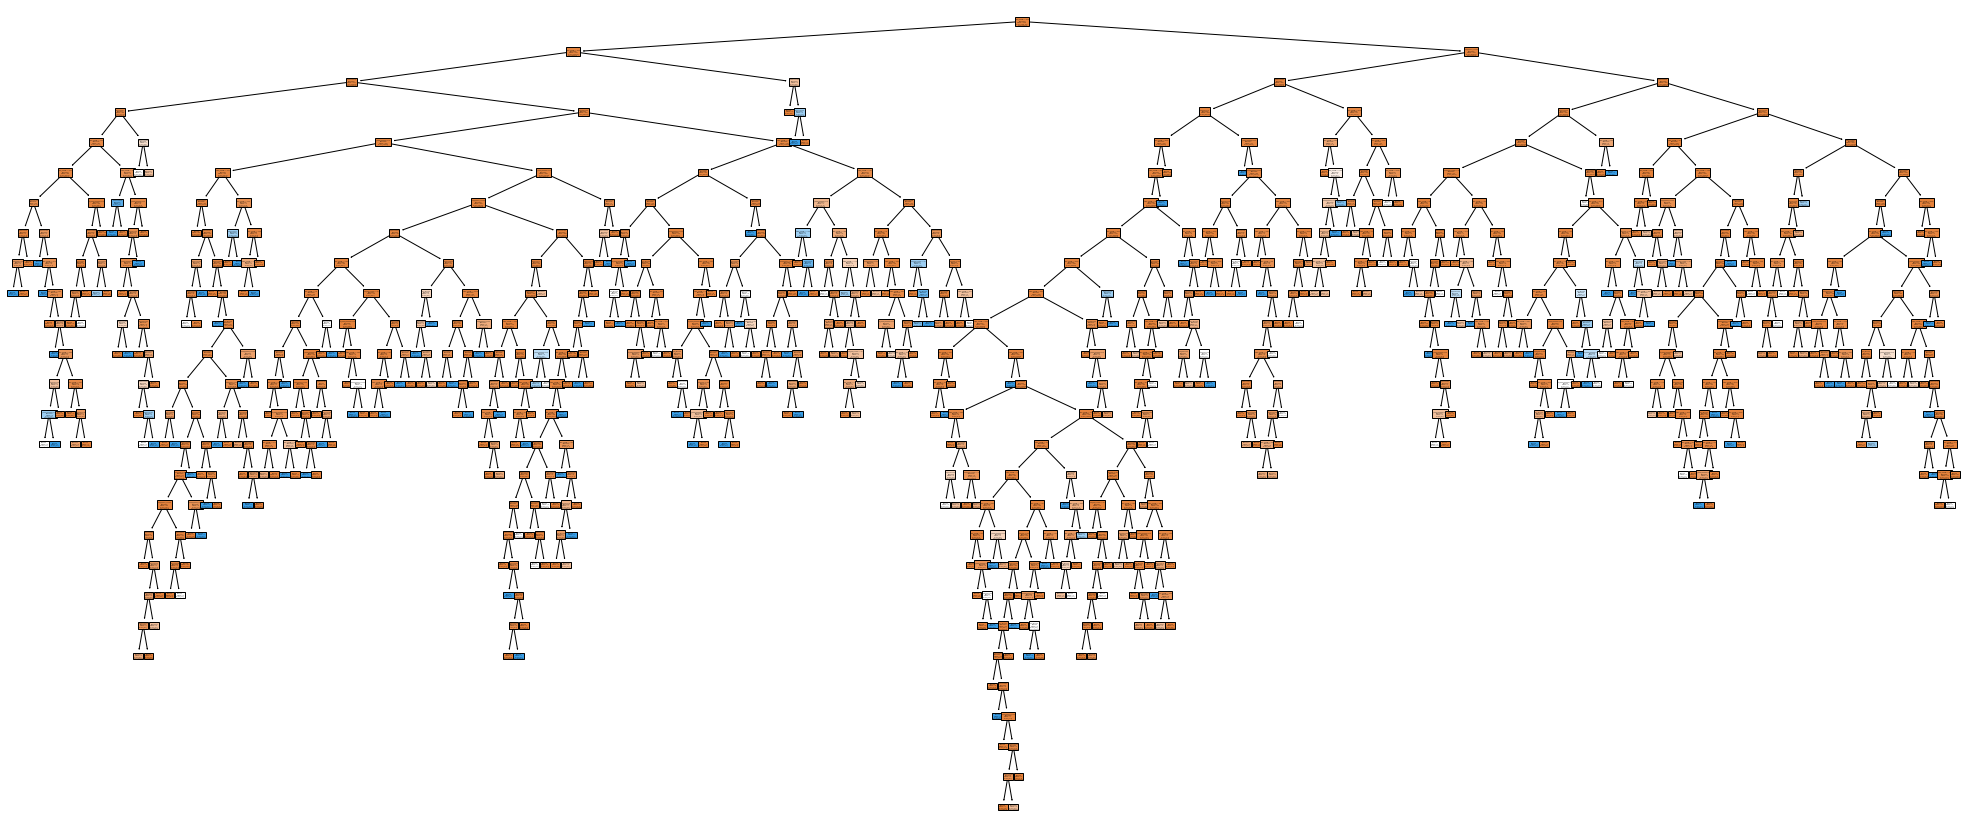

In [150]:
plt.figure(figsize=(35, 15))
plot_tree(clf,
         filled=True,
         class_names=['Approved', 'Disapproved'],
         feature_names=x.columns);

## Confusion matrix for training dataset

In [141]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

In [204]:
y_rat_test = clf.predict(x_test)
y_rat_test

array([0, 0, 0, ..., 0, 0, 0])

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


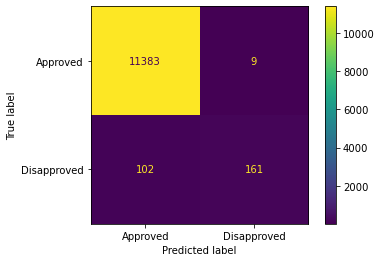

In [151]:
plot_confusion_matrix(clf, x_train, y_train, display_labels=['Approved', 'Disapproved']);

In [165]:
accuracy_train = accuracy_score(y_train, y_rat_train)

In [166]:
accuracy_train

0.9904761904761905

# Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

## Decision Tree for test dataset

In [157]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [159]:
clf = clf.fit(x_test,y_test)
clf

DecisionTreeClassifier(random_state=100)

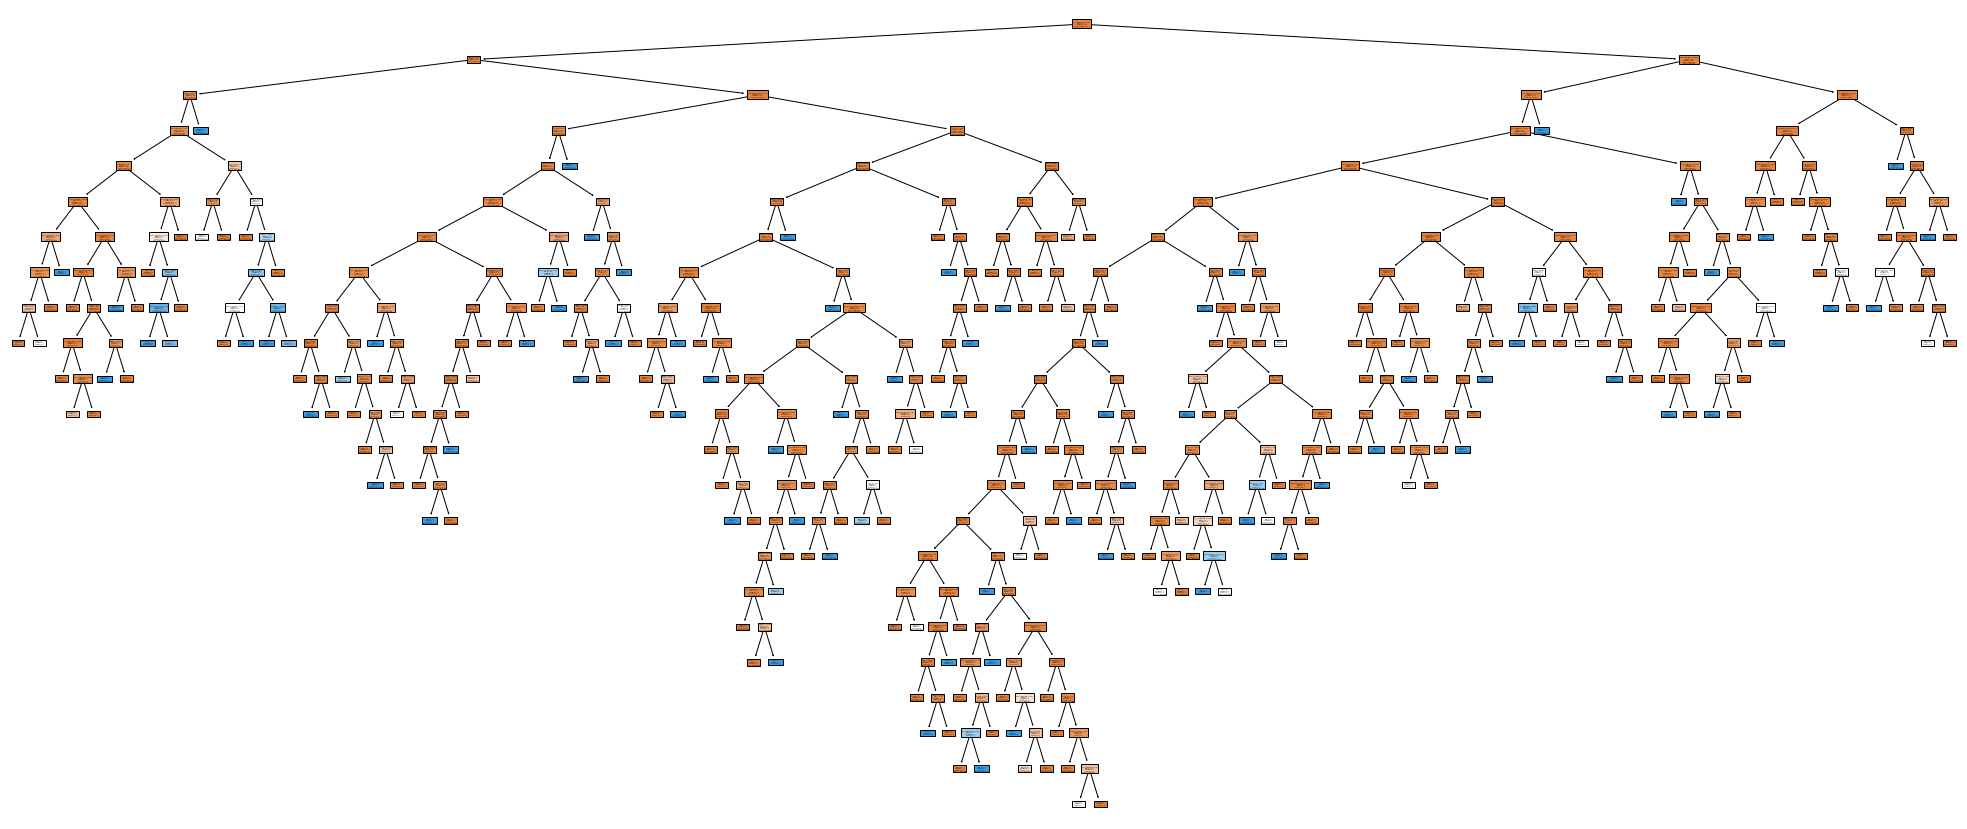

In [160]:
plt.figure(figsize=(35, 15))
plot_tree(clf,
         filled=True,
         class_names=['Approved', 'Disapproved'],
         feature_names=x.columns);

 ## Confusion matrix for test dataset

In [161]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_test,y_test)

In [162]:
y_rat_test = clf.predict(x_test)
y_rat_test

array([0, 0, 0, ..., 0, 0, 0])

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


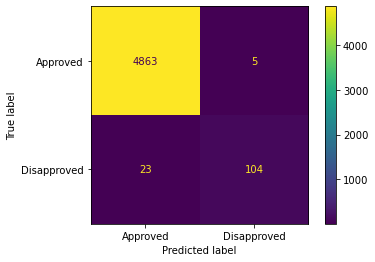

In [163]:
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Approved', 'Disapproved']);

In [167]:
accuracy_test = accuracy_score(y_test, y_rat_test)

In [168]:
accuracy_test

0.9943943943943944

In [169]:
comparing_test_with_train = accuracy_test - accuracy_train

In [170]:
comparing_test_with_train

0.003918203918203855

As we can see, the training accuracy and test accurancy is very similar

## Training a new TreeDecision with depth=10 and samples leaf =5

In [223]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_train)
accuracy_score(y_train, predict)

0.9790647790647791

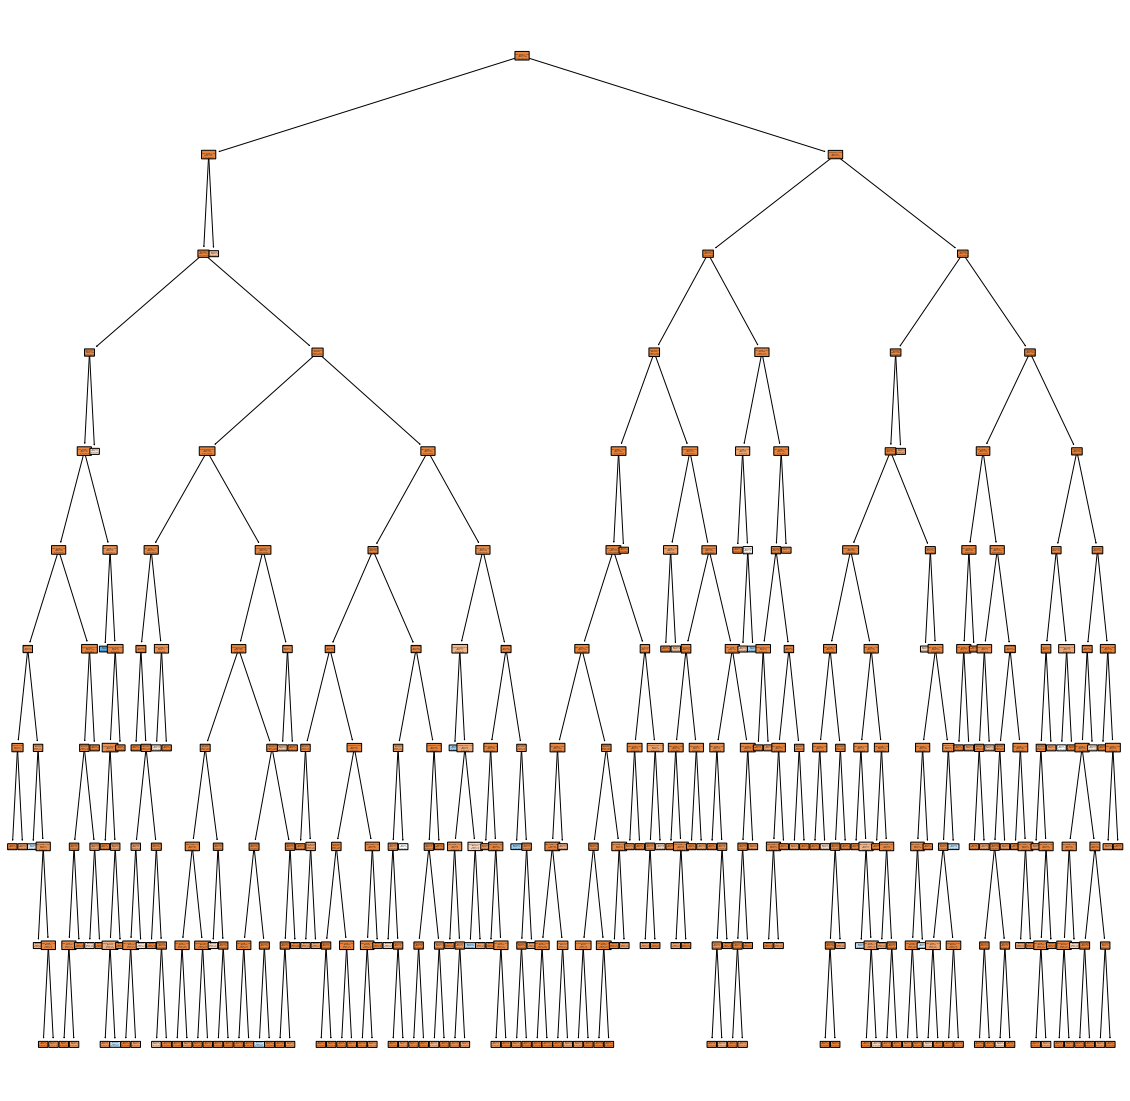

In [224]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Approved', 'Disapproved'],
         feature_names=x_train.columns);

In [225]:
clf = DecisionTreeClassifier(random_state=123)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [226]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

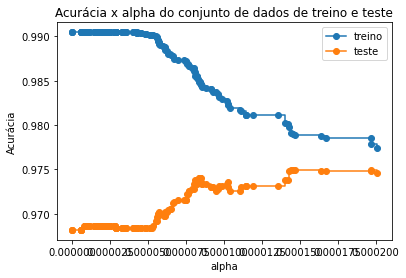

In [227]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas, train_scores, marker='o', label='treino', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='teste', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [228]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.968168
1,0.000000,0.968168
2,0.000000,0.968168
3,0.000006,0.968168
4,0.000006,0.968168
...,...,...
149,0.000164,0.974775
150,0.000167,0.974775
151,0.000197,0.974775
152,0.000197,0.974975


In [229]:
clf_pruning = DecisionTreeClassifier(random_state=123, ccp_alpha=0.000197)

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9747747747747748

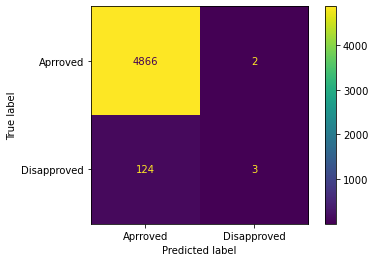

In [230]:
clf_pruning.fit(x_train, y_train)
predict = clf_pruning.predict(x_test)
plot_confusion_matrix(clf_pruning, x_test, y_test, display_labels= ['Aprroved', 'Disapproved']);
accuracy_score(y_test, predict)

In [231]:
pred = clf_pruning.predict(x_test)

In [232]:
accuracy_score(y_test, pred)

0.9747747747747748

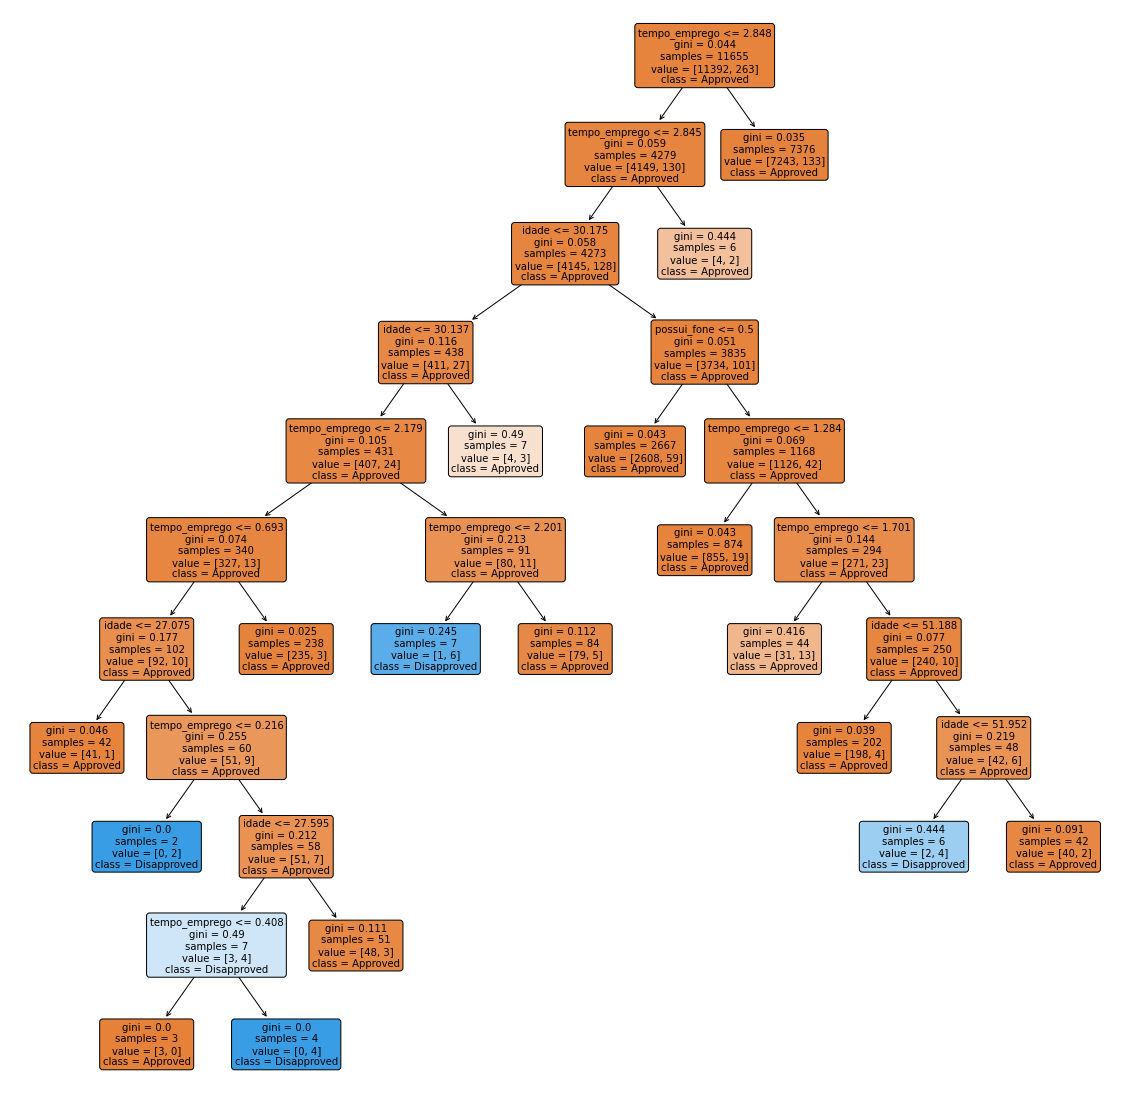

In [234]:
plt.figure(figsize=[20, 20])
plot_tree(clf_pruning,
         filled=True,
         rounded=True,
         class_names=['Approved', 'Disapproved'],
         feature_names=x_train.columns);

## classifield as 'mau'

In [239]:
y_test.sum()

127

In [240]:
y_train.sum()

263

## Classifing all of client, for training dataset as 'bons'

In [247]:
y_ajusted_as_all_good_training_dataset = y_train.where(y > 1, 0)

In [248]:
y_ajusted_as_all_good_training_dataset

13649    0
479      0
15216    0
2403     0
9248     0
        ..
16304    0
79       0
12119    0
14147    0
5640     0
Name: mau, Length: 11655, dtype: int32

In [249]:
y_ajusted_as_all_good_training_dataset.sum()

0

In [250]:
accuracy = accuracy_score(y_ajusted_as_all_good_training_dataset, y_rat_train)

In [251]:
accuracy

0.9854139854139854

## Classifing all of client as 'bons'

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


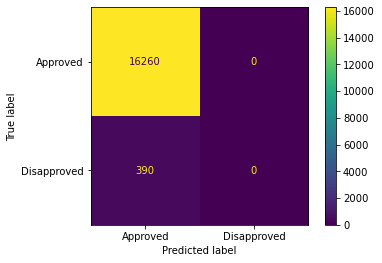

In [253]:
plot_confusion_matrix(clf, x, y, display_labels=['Approved', 'Disapproved']);

In [254]:
predict = clf.predict(x)

In [255]:
accuracy_score(y, predict)

0.9765765765765766

In [256]:
y_ajusted_as_all_good = y.where(y > 1, 0)

In [257]:
y_ajusted_as_all_good.sum()

0

In [258]:
accuracy_c = accuracy_score(y_ajusted_as_all_good, predict)

In [259]:
accuracy_c

1.0